### 引入相關python模組

In [1]:
from mycnn import FCN8, FCN16, FCN32
from mycnn import data
from mycnn import utils
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data.make_voc_segment_dataset(
    r"D:\Datasets\VOC\VOCdevkit\VOC2012",
    "./datasets"
)

Make some folders.
Get data list.
Already made dataset.


In [3]:
ds = data.generate_segmentation_dataset(
    "./datasets/VOCSegmentation/train",
    image_size=(224,224),
    batch_size=2,
    # subtract_mean=0,
    # divide_stddev=255,
    shuffle_filepath=True,
    # shuffle_dataset=True,
    # validation_split=0.2,
)

Read segmentation dataset.

Found 2913 image files and 2913.

all - RGB image - Not use data augmentation.
Rescale value to [0, 255].


(2, 224, 224, 3)
(2, 224, 224, 21)


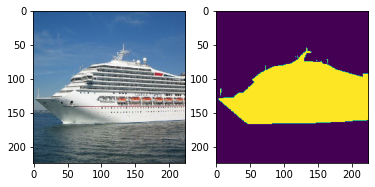

In [4]:
for i, m in ds.take(1):
    bi = i
    bm = m
print(bi.shape)
print(bm.shape)

idx = 1
plt.subplot(121)
plt.imshow(bi[idx]/255)
plt.subplot(122)
plt.imshow(bm[idx,...,4])
plt.show()

### 載入FCN模型

In [5]:
fcn8 = FCN8(classes_num=21)
fcn8.summary()

Model: "FCN8"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
image (InputLayer)                     [(None, 224, 224, 3)]      0                                                     
________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                  (None, 224, 224, 64)       1792          image[0][0]                             
________________________________________________________________________________________________________________________
block1_bn1 (BatchNormalization)        (None, 224, 224, 64)       256           block1_conv1[0][0]                      
________________________________________________________________________________________________________________________
block1_relu1 (ReLU

In [6]:
fcn8.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="categorical_crossentropy")
fcn8.fit(ds)


[Info] Use `tf.keras.Model` method compile


[Info] Use `tf.keras.Model` method fit

1457/1457 [==============================] - 726s 494ms/step - loss: 1.3072
